In [20]:
!pip install -U pip

In [21]:
!pip list

Package                           Version
--------------------------------- --------------
aiobotocore                       2.14.0
aiofiles                          22.1.0
aiohappyeyeballs                  2.4.0
aiohttp                           3.10.5
aioitertools                      0.11.0
aiosignal                         1.3.1
aiosqlite                         0.20.0
amazon-braket-default-simulator   1.26.0
amazon-braket-schemas             1.22.1
amazon-braket-sdk                 1.87.1
annotated-types                   0.7.0
antlr4-python3-runtime            4.9.2
anyio                             4.4.0
argon2-cffi                       23.1.0
argon2-cffi-bindings              21.2.0
arrow                             1.3.0
astroid                           3.2.4
asttokens                         2.4.1
async-lru                         2.0.4
async-timeout                     4.0.3
attrs                             23.2.0
autopep8                          2.0.4
autovizwidget     

In [22]:
!pip install amazon-braket-sdk

In [23]:
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.87.1
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/amazon-braket/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages
Requires: amazon-braket-default-simulator, amazon-braket-schemas, backoff, backports.entry-points-selectable, boltons, boto3, cloudpickle, nest-asyncio, networkx, numpy, openpulse, openqasm3, oqpy, sympy
Required-by: 


In [24]:
!pip install amazon-braket-sdk --upgrade --upgrade-strategy eager

In [25]:
!pip show amazon-braket-sdk

Name: amazon-braket-sdk
Version: 1.87.1
Summary: An open source library for interacting with quantum computing devices on Amazon Braket
Home-page: https://github.com/amazon-braket/amazon-braket-sdk-python
Author: Amazon Web Services
Author-email: 
License: Apache License 2.0
Location: /home/ec2-user/anaconda3/envs/JupyterSystemEnv/lib/python3.10/site-packages
Requires: amazon-braket-default-simulator, amazon-braket-schemas, backoff, backports.entry-points-selectable, boltons, boto3, cloudpickle, nest-asyncio, networkx, numpy, openpulse, openqasm3, oqpy, sympy
Required-by: 


# Getting started with Amazon Braket

In this hello-world tutorial we prepare a maximally entangled Bell state between two qubits. We then run our circuit on a local simulator and obtain the results.

In [5]:
# general imports
import matplotlib.pyplot as plt
%matplotlib inline

# AWS imports: Import Braket SDK modules
from braket.circuits import Circuit
from braket.devices import LocalSimulator

## Build a circuit

Let's build a Bell state with two qubits. By calling `Circuit()` we create an empty circuit, and we can just add gates to the circuit. 

In [9]:
# build a Bell state with two qubits. Here 'cnot(control=0, target=1)' can be simplified as 'cnot(0,1)'
bell = Circuit().h(0).cnot(control=0, target=1)
print(bell)

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


In [33]:
print(bell.diagram())

T  : │  0  │  1  │
      ┌───┐       
q0 : ─┤ H ├───●───
      └───┘   │   
            ┌─┴─┐ 
q1 : ───────┤ X ├─
            └───┘ 
T  : │  0  │  1  │


## Submit the circuit to the local simulator and obtain the results

Here we submit our circuit to the local simulator and obtain the results.

In [36]:
# set up device
device = LocalSimulator()

# run circuit
result = device.run(bell, shots=1000).result()
# get measurement shots
counts = result.measurement_counts
# print counts
print(counts)

Counter({'00': 530, '11': 470})


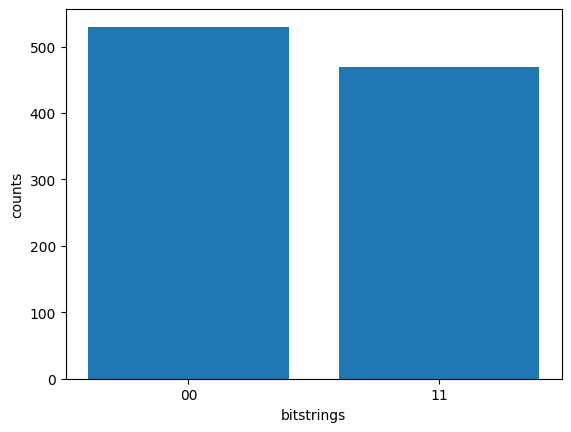

In [37]:
# plot using Counter
plt.bar(counts.keys(), counts.values());
plt.xlabel('bitstrings');
plt.ylabel('counts');